# PROBLEM SET 3 - Macroscopic Traffic Simulation

The compute for the traffic density iterate, you will use
$$\varrho_{i,j+1}=\varrho_{i,j}-\left(\frac{\delta t}{h}\right)v_{max}\left(\left(1-\frac{\varrho_{i+1,j}}{\varrho_{max}}\right)\varrho_{i+1,j}-\left(1-\frac{\varrho_{i,j}}{\varrho_{max}}\right)\varrho_{i,j}\right).$$

For the predictor-corrector model of MacCormack, use
- predictor step: $\tilde{\varrho}_{i,j+1} = \varrho_{i,j} - \delta t \frac{f_{i,j} - f_{i-1,j}}{h}$.
- corrector step: $\varrho_{i,j+1} = \varrho_{i,j} - \frac{\delta t}{2}\left(\frac{f_{i,j} - f_{i-1,j}}{h} - \frac{\tilde{f}_{i+1,j+1} - \tilde{f}_{i,j+1}}{h}\right)$.

## A. Unstable model without the predictor-corrector method

Use the sinusoidal function $f(x)=-25sin\left(\frac{2\pi}{10}x\right)+80$ for the initial values of the traffic densities at different points on the road, $\varrho_{i,0}, \forall i$.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Required parameters for the simulation model 
vmax = 120   #km/hr (maximum velocity)
pmax = 160   #veh/km (maximum density)
t_end = 0.2  #hr  (length of the simulation)
x_end = 10   #km (length of the road)
h = 0.1      #km (length of each section of the road)
dt = 0.001   #hr (time step)

t_int = int(t_end/dt) #number of time intervals
x_int = int(x_end/h)  #number of road distance intervals

t = np.linspace(0,t_end,t_int) #discrete time instants
x = np.linspace(0,x_end,x_int) #discrete road positions

p=np.zeros((x_int,t_int)) #predefining density array for efficiency

#Initial Values (IV)
p[:,0]=(-25)*np.sin(2*math.pi*x/10)+80

#Boundary values (BV)
p[0,:]=p[0,0]
p[int(x_end/h)-1,:]=p[0,:]

In [2]:
#Computing for density values (Explicit Euler step in the time direction)
for j in range(0,len(t)-1):        
    for i in range(1,len(x)-1):
        p[i,j+1]=p[i,j]-((dt/h)*vmax*(((1-(p[(i+1),j]/pmax))*p[(i+1),j])-((1-(p[i,j]/pmax))*p[i,j])))

C:\Users\VANIEB~1\AppData\Local\Temp/ipykernel_14964/2963824752.py:4: RuntimeWarning: overflow encountered in double_scalars
  p[i,j+1]=p[i,j]-((dt/h)*vmax*(((1-(p[(i+1),j]/pmax))*p[(i+1),j])-((1-(p[i,j]/pmax))*p[i,j])))
C:\Users\VANIEB~1\AppData\Local\Temp/ipykernel_14964/2963824752.py:4: RuntimeWarning: invalid value encountered in double_scalars
  p[i,j+1]=p[i,j]-((dt/h)*vmax*(((1-(p[(i+1),j]/pmax))*p[(i+1),j])-((1-(p[i,j]/pmax))*p[i,j])))


In [3]:
#Assigning positive and negative infinity density values to large (200) and small (0) values respectively for plot compatibility
for i in range(0,len(p[:,0])):
    for j in range(0,len(p[0,:])):
        if math.isnan(p[i,j]):
            p[i,j] =  0
            
for i in range(0,len(p[:,0])):
    for j in range(0,len(p[0,:])):
        if p[i,j]==float('inf'):
            p[i,j] = 200
        elif p[i,j] > 200:
            p[i,j] = 200
        elif p[i,j]==float('-inf'):
            p[i,j] = 0
        elif p[i,j] < -200:
            p[i,j] = 0

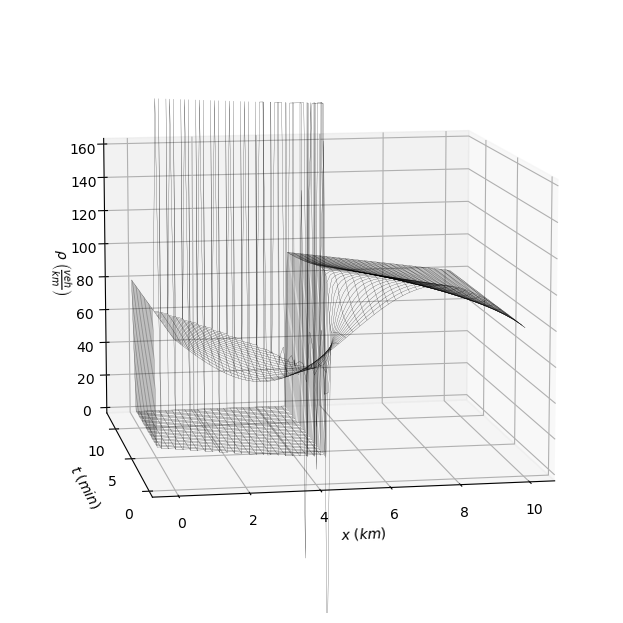

In [4]:
#Visualizations
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k') #figure size
t=t*60 #Converting hours to minutes
X, Y = np.meshgrid(x,t)
X=np.transpose(X)
Y=np.transpose(Y)
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, p, color='black', linewidth=0.15)
ax.set_zlim3d(0,160)
ax.view_init(10, -100) #rotating the 3d graph

#labeling
ax.set_zlabel(r'$\rho$ $\left(\frac{veh}{km}\right)$', rotation=100)
ax.set_ylabel(r'$t$ $(min)$', rotation=0)
ax.set_xlabel(r'$x$ $(km)$', rotation=0)

plt.rcParams.update({'font.size': 10}) #fint size
plt.locator_params(axis='y', nbins=3) #y axis bins
plt.locator_params(axis='x', nbins=10) #x axis bins
plt.show() #A 'runtime warning:overflow' will show as there are inf, -inf, and nan density values (which are normal and expected)

## B. Stable model with the predictor-corrector model

Use the same sinusoidal function in A for $\varrho_{i,0}, \forall i$.

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Required parameters for the simulation model 
vmax = 120   #km/hr (maximum velocity)
pmax = 160   #veh/km (maximum density)
t_end = 0.2  #hr  (length of the simulation)
x_end = 10   #km (length of the road)
h = 0.1      #km (length of each section of the road)
dt = 0.001   #hr (time step)

t_int = int(t_end/dt) #number of time intervals
x_int = int(x_end/h)  #number of road intervals

t = np.linspace(0,t_end,t_int) #discrete time instants
x = np.linspace(0,x_end,x_int) #discrete road positions

p=np.zeros((x_int,t_int)) #predefining density array for efficiency

#Initial Values (IV)
p[:,0]=(-25)*np.sin(2*math.pi*x/10)+80

#Boundary values (BV)
p[0,:]=p[0,0]
p[int(x_end/h)-1,:]=p[0,:]

In [6]:
#Define flow function as required by predictor and corrector step
def f(i,j):
    return vmax*(1-(p[i,j]/pmax))*p[i,j]

#Define flow function (f~) with predictor step as input as required by corrector step
def F(i,j):
    return vmax*(1-(P(i,j)/pmax))*P(i,j)

#PREDICTOR STEP (p~)
def P(i,j):
    return p[i,j-1]-dt*((f(i,j-1)-f(i-1,j-1))/h)

#CORRECTOR STEP
for j in range(0,len(t)-1):        
    for i in range(1,len(x)-1):
        p[i,j+1] = p[i,j]-(dt/2)*(((f(i,j)-f(i-1,j))/h)+((F(i+1,j+1)-F(i,j+1))/h))

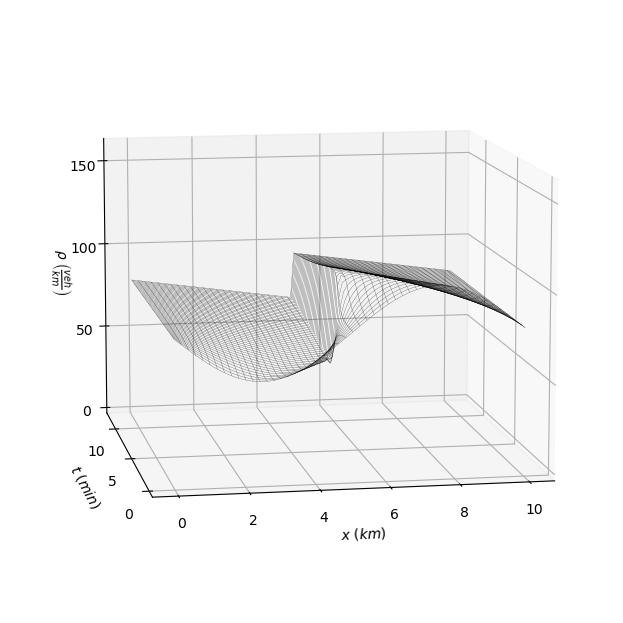

In [7]:
#Visualizations
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k') #figure size
t=t*60 #Converting hours to minutes
X, Y = np.meshgrid(x,t)
X=np.transpose(X)
Y=np.transpose(Y)
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, p, color='black', linewidth=0.15)
ax.set_zlim3d(0,160)
ax.view_init(10, -100) #rotating the 3d graph

#labeling
ax.set_zlabel(r'$\rho$ $\left(\frac{veh}{km}\right)$', rotation=100)
ax.set_ylabel(r'$t$ $(min)$', rotation=0)
ax.set_xlabel(r'$x$ $(km)$', rotation=0)

plt.rcParams.update({'font.size': 22}) #fint size
plt.locator_params(axis='y', nbins=3) #y axis bins
plt.locator_params(axis='x', nbins=10) #x axis bins
plt.show()